In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import statistics as stat
import scipy.optimize 


##Berechnung der Proportionalitätskonstanten
sig_x = 0.5
I = 6.58e-7
t = np.arange(50,550,50)/1000
x = np.array([79,156,234,311,387,463,542,619,695,774])
Q = I*t
lamb = Q/x
sig_lamb = sig_x*Q/x**2
print(lamb,sig_lamb)


##Gewichteten Mittelwert berechnen
fak = np.array([0.416,0.422,0.422,0.4231,0.4251,0.4263,0.4250,0.4252,0.4260,0.4251])*1e-9
sig_fak = np.array([0.003,0.002,0.001,0.0007,0.0006,0.0005,0.0004,0.0004,0.0004,0.0003])*1e-9

a = 0
b = 0
for i in range(len(fak)):
    a += fak[i]/sig_fak[i]**2
    b += 1/sig_fak[i]**2
    
fak_mean = a/b
sig_fak_mean = np.sqrt(1/b)

print(fak_mean, sig_fak_mean)


[4.16455696e-10 4.21794872e-10 4.21794872e-10 4.23151125e-10
 4.25064599e-10 4.26349892e-10 4.24907749e-10 4.25201939e-10
 4.26043165e-10 4.25064599e-10] [2.63579555e-12 1.35190664e-12 9.01271094e-13 6.80307276e-13
 5.49179069e-13 4.60421050e-13 3.91981318e-13 3.43458755e-13
 3.06505874e-13 2.74589535e-13]
4.251363942688866e-10 1.5803327434500582e-13


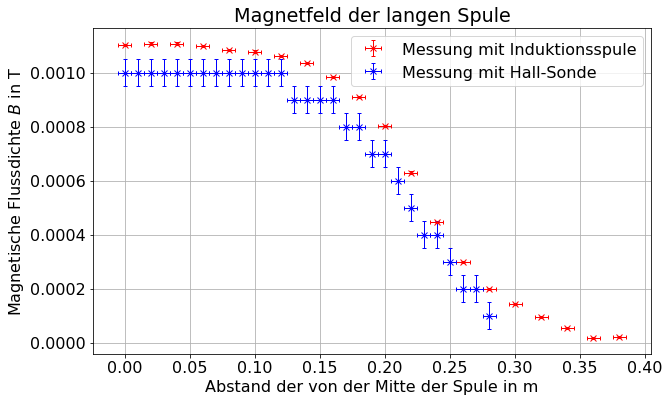

In [3]:
##Magnetfeld der langen Spule mit Induktionsspule
fak = 0.4264e-9
sig_fak = 0.0006e-9
b = -0.8e-9
sig_b = 0.3e-9
x = np.loadtxt("langespule_ind.txt", usecols = 1) ##Ladung in skt
d = np.loadtxt("langespule_ind.txt", usecols = 0)/100 ##position 
d -= d[0]
sig_d = 0.005
Q = fak * x + b
sig_Q = np.sqrt(sig_fak**2*x**2+sig_x**2*fak**2+sig_b**2)


Ri = 10000
N = 369
L = 0.006
r = 0.059/2
A = r**2*np.pi
B = Ri*Q/(N*A)
sig_B = sig_Q*Ri/(N*A)


plt.figure(figsize=(10,6))
plt.grid()
plt.title("Magnetfeld der langen Spule")
plt.errorbar(d,B,xerr = sig_d,yerr = sig_B,fmt = 'x',color = 'r',ecolor ='r',linewidth = 1,label = "Messung mit Induktionsspule",capsize = 2)

##Magnetfeld der langen Spule mit Hallsonde
B = np.loadtxt("langespule_hall.txt", usecols = 1)/10000 ##Magnetfeld
sig_B = 0.5/10000
d = np.loadtxt("langespule_hall.txt", usecols = 0)/100 ##position 
d -= d[0]

plt.errorbar(d,B,xerr = sig_d,yerr = sig_B,fmt = 'x',color = 'b',ecolor ='b',linewidth = 1,label = "Messung mit Hall-Sonde",capsize = 2)


plt.xlabel("Abstand der von der Mitte der Spule in m")
plt.ylabel("Magnetische Flussdichte $B$ in T")
plt.legend(loc = "upper right")
plt.savefig("longboi.png",dpi = 200)




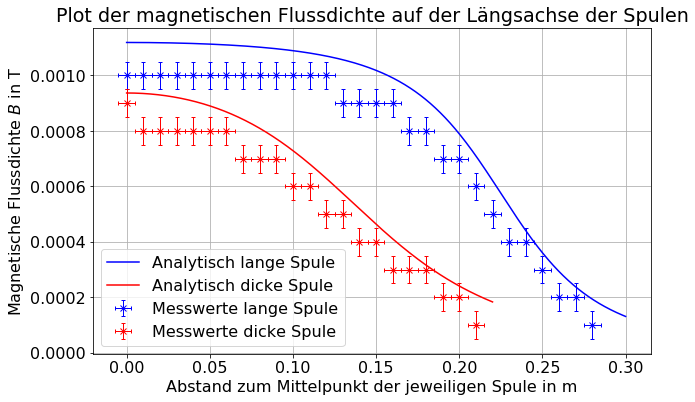

In [4]:
##Feldstärke H der beiden Spulen
mu0 = 1.256637e-6
sig_B = 0.5/10000
sig_d = 0.005

dl = np.loadtxt("langespule_hall.txt",usecols = 0)/100
dl -= dl[0]
Bl = np.loadtxt("langespule_hall.txt",usecols = 1)/10000
dd = np.loadtxt("dickespule_hall.txt",usecols = 0)/100
dd -= dd[0]
Bd = np.loadtxt("dickespule_hall.txt",usecols = 1)/10000


def B(n,I,L,z,R): ##theoretische Formel
    return mu0*n*I/(2*L)*((z+L/2)/(np.sqrt(R**2+(z+L/2)**2)) - (z-L/2)/np.sqrt(R**2+(z-L/2)**2))


x1 = np.linspace(0,0.3,1000)
x2 = np.linspace(0,0.22,1000)

plt.figure(figsize=(10,6))
plt.grid()
plt.title("Plot der magnetischen Flussdichte auf der Längsachse der Spulen")
plt.errorbar(dl,Bl,xerr = sig_d,yerr = sig_B,fmt = 'x',color = 'b',ecolor ='b',linewidth = 1,label = "Messwerte lange Spule",capsize = 2)
plt.errorbar(dd,Bd,xerr = sig_d,yerr = sig_B,fmt = 'x',color = 'r',ecolor ='r',linewidth = 1,label = "Messwerte dicke Spule",capsize = 2)
plt.plot(x1,B(832,0.5,0.45,x1,0.1255/2),color = 'b', label = "Analytisch lange Spule")
plt.plot(x2,B(501,0.5,0.27,x2,0.2/2),color = 'r', label = "Analytisch dicke Spule")
plt.xlabel("Abstand zum Mittelpunkt der jeweiligen Spule in m")
plt.ylabel("Magnetische Flussdichte $B$ in T")
plt.legend(loc = "lower left")
plt.savefig("Hbeide.png",dpi = 200)

plt.show()




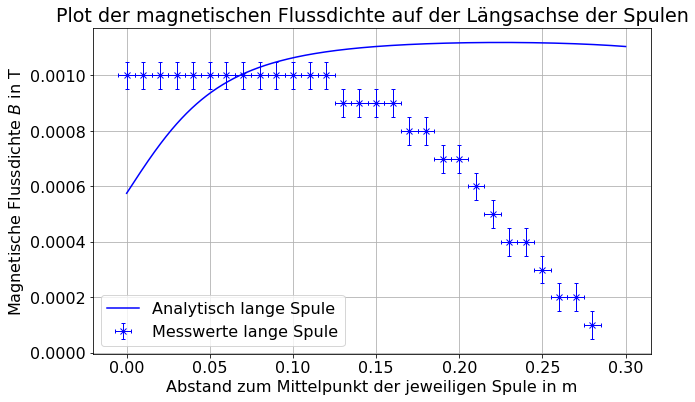

In [15]:
##Feldstärke H der beiden Spulen
mu0 = 1.256637e-6
sig_B = 0.5/10000
sig_d = 0.005

dl = np.loadtxt("langespule_hall.txt",usecols = 0)/100
dl -= dl[0]
Bl = np.loadtxt("langespule_hall.txt",usecols = 1)/10000
dd = np.loadtxt("dickespule_hall.txt",usecols = 0)/100
dd -= dd[0]
Bd = np.loadtxt("dickespule_hall.txt",usecols = 1)/10000


def B(n,I,l,a,r):
    return mu0*(1/2)*((n*I)/l)*((a/np.sqrt(r**2+a**2))+((l-a)/np.sqrt(r**2+(l-a)**2)))


a = np.linspace(0,0.3,1000)
x2 = np.linspace(0,0.22,1000)

plt.figure(figsize=(10,6))
plt.grid()
plt.title("Plot der magnetischen Flussdichte auf der Längsachse der Spulen")
plt.errorbar(dl,Bl,xerr = sig_d,yerr = sig_B,fmt = 'x',color = 'b',ecolor ='b',linewidth = 1,label = "Messwerte lange Spule",capsize = 2)
plt.plot(a,B(832,0.5,0.45,a,(1255*(10**(-4)))/2),color = 'b', label = "Analytisch lange Spule")
plt.xlabel("Abstand zum Mittelpunkt der jeweiligen Spule in m")
plt.ylabel("Magnetische Flussdichte $B$ in T")
plt.legend(loc = "lower left")


plt.show()